In [849]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, MinMaxScaler, StandardScaler, FunctionTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import zscore

* Load CSV file:

In [751]:
customer_df = pd.read_csv('credit_customers.csv')

* EDA step:

In [752]:
customer_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


        Data set shape


In [753]:
print(f'Data set consists of {customer_df.shape[0]} entries with {customer_df.shape[1]-1} feature for each entry')

Data set consists of 1000 entries with 20 feature for each entry


        Data Set information

In [754]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

### Insight of the data: some of the features (columns) have null values. For example, checking_status has 91 null values.

<Axes: xlabel='class', ylabel='count'>

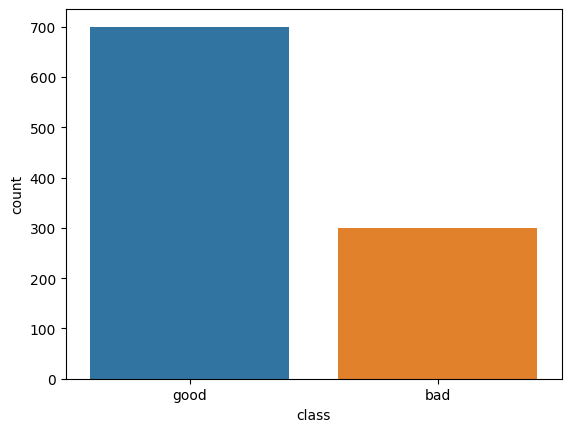

In [755]:
sns.countplot(x='class', data=customer_df, hue='class')

### The data is not balanced

        Numerical features

            Description

In [756]:
customer_df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.85,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


### Numerical features Insights:
1. most of the data does not follow a normal distribuiton.
2. Data need to be scaled.

            Correlation

In [757]:
customer_df.corr(numeric_only=True)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.00,0.62,0.07,0.03,-0.04,-0.01,-0.02
credit_amount,0.62,1.00,-0.27,0.03,0.03,0.02,0.02
installment_commitment,0.07,-0.27,1.00,0.05,0.06,0.02,-0.07
residence_since,0.03,0.03,0.05,1.00,0.27,0.09,0.04
age,-0.04,0.03,0.06,0.27,1.00,0.15,0.12
existing_credits,-0.01,0.02,0.02,0.09,0.15,1.00,0.11
num_dependents,-0.02,0.02,-0.07,0.04,0.12,0.11,1.00


### There is almost no correclation between features except for duration and credit_amount(positive correlation)

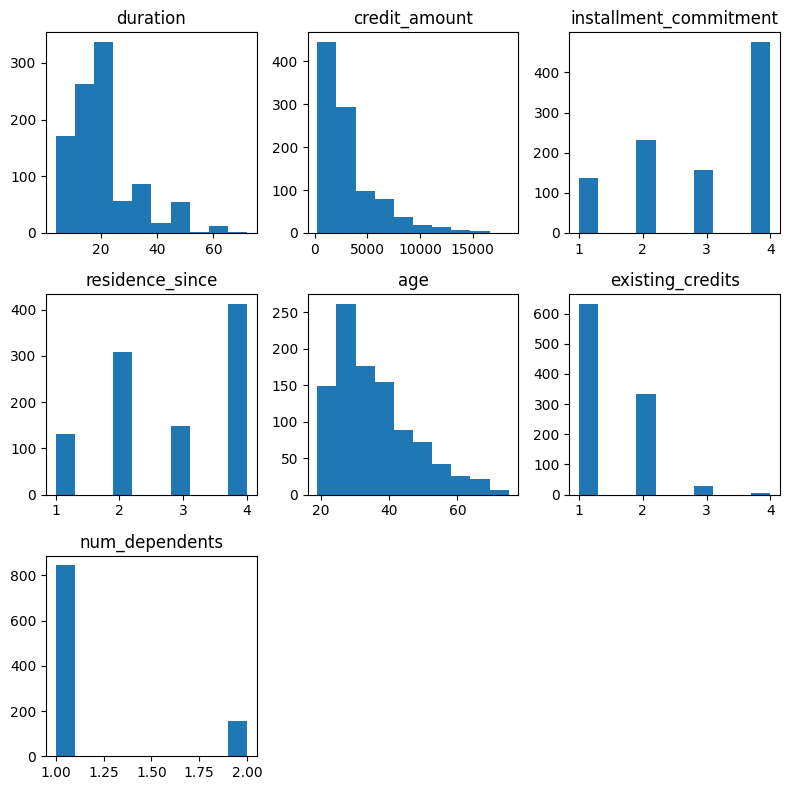

In [758]:
_,axs = plt.subplots(nrows=3,ncols=3,figsize = (8,8))
numerical_col = customer_df.select_dtypes("int").columns
for i,ax in enumerate(axs.flatten()):
    if i < len(numerical_col):
        ax.hist(customer_df[numerical_col[i]])
        ax.set_title(numerical_col[i])
    else:
        ax.set_visible(False)


plt.tight_layout()
plt.show()

### As expected,from the pervious graph the plot of each features shows:
1. most of the feature do not follow a normal distribuation
2. Features are not scaled.

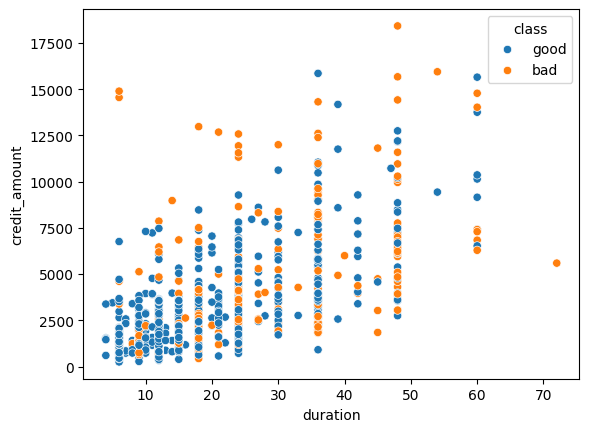

In [759]:
sns.scatterplot(x = 'duration', y = 'credit_amount',data = customer_df, hue='class')
plt.show()

### The graph shows a +ve correlation between 'duration' and 'credit_amount' as expected

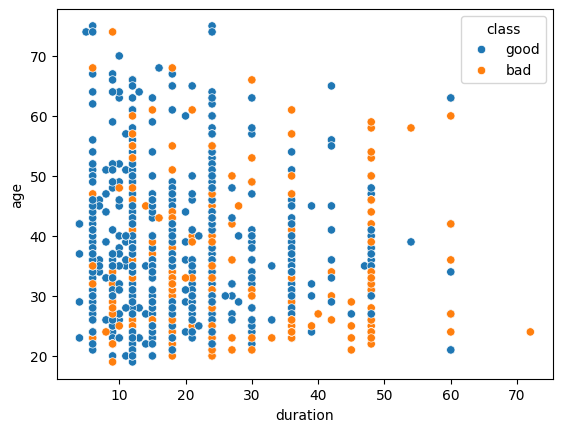

In [760]:
sns.scatterplot(x = 'duration', y = 'age',data = customer_df, hue='class')
plt.show()

### On the other hand no correclation between 'duration' and 'age'

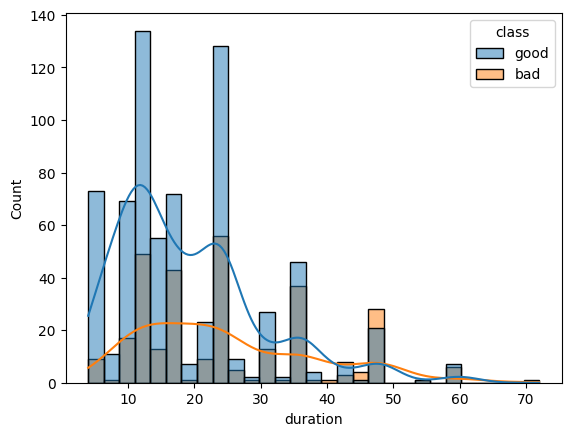

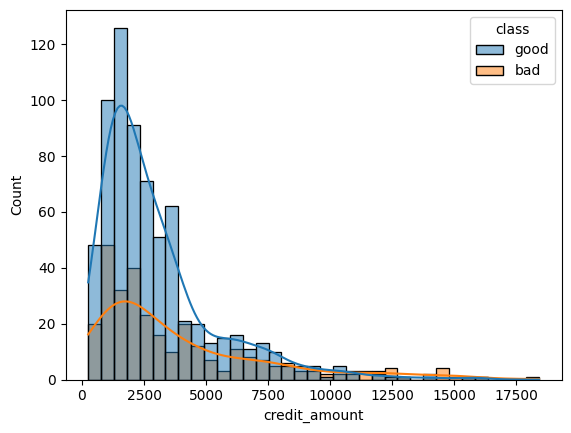

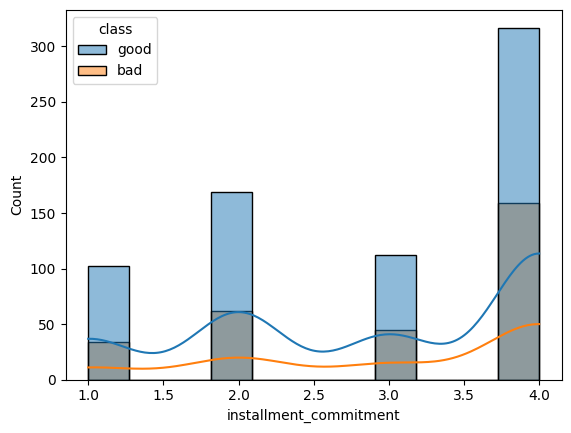

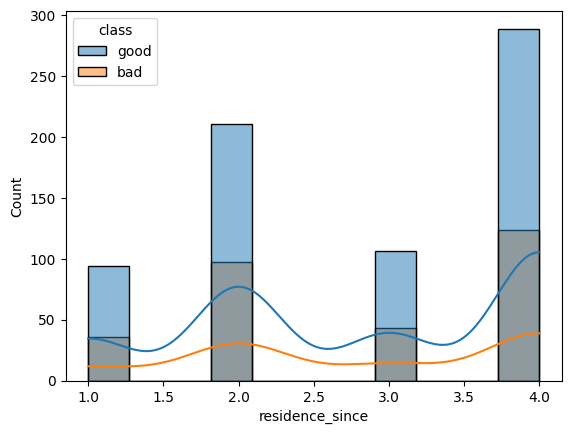

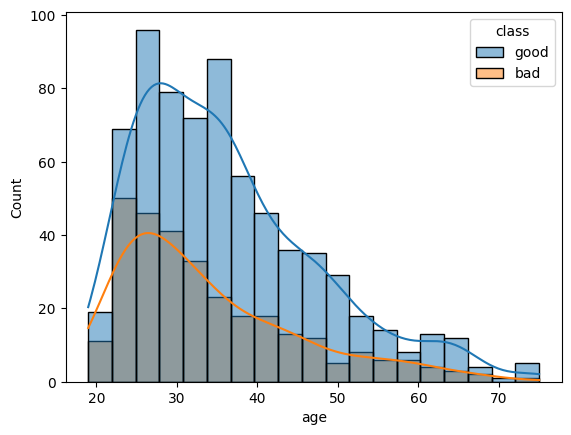

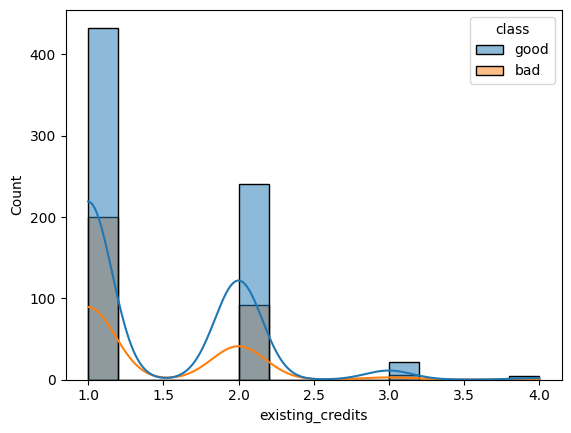

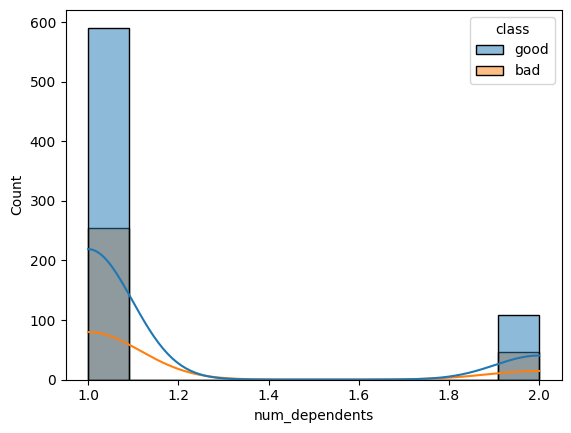

In [761]:
for col in customer_df.select_dtypes("int"):
    sns.histplot(x=col, data=customer_df,kde=True, hue='class')
    plt.show()

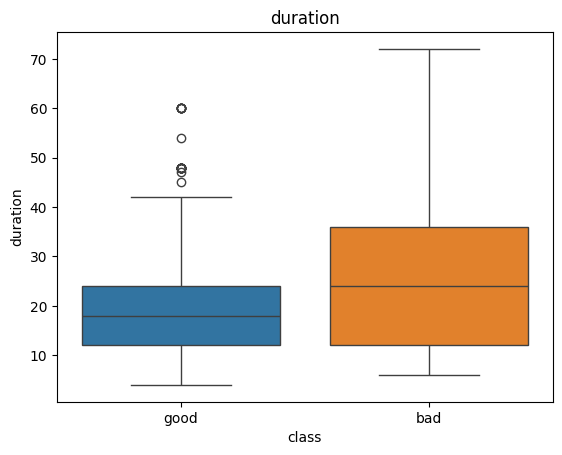

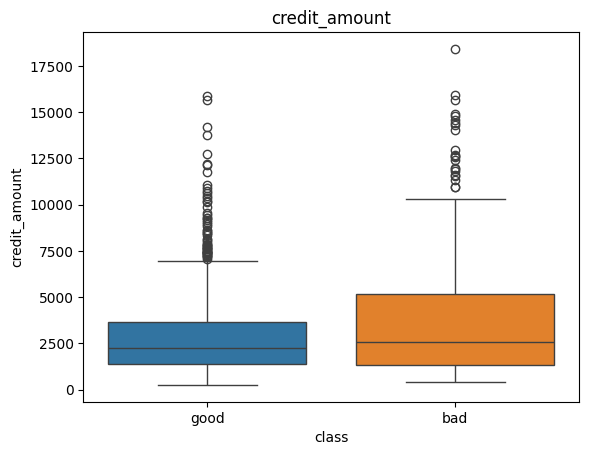

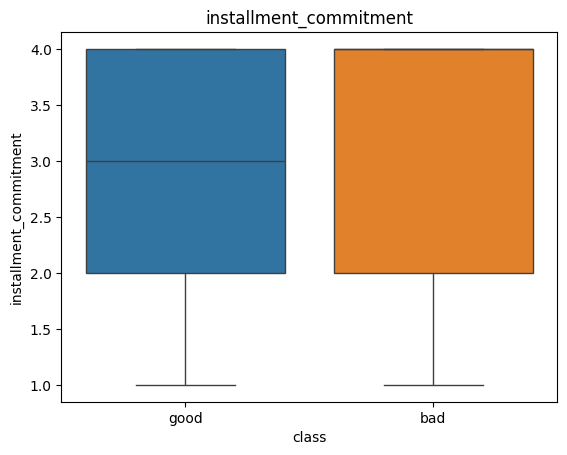

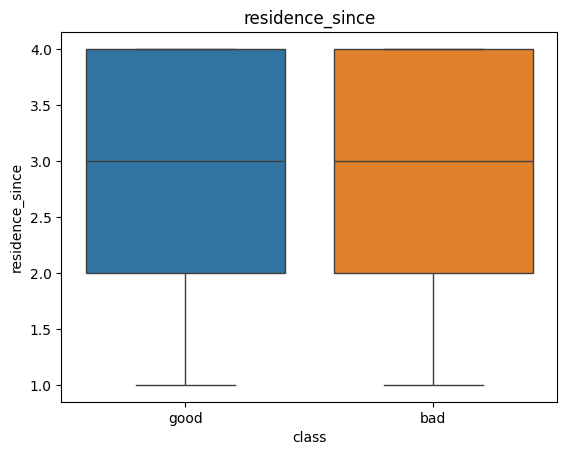

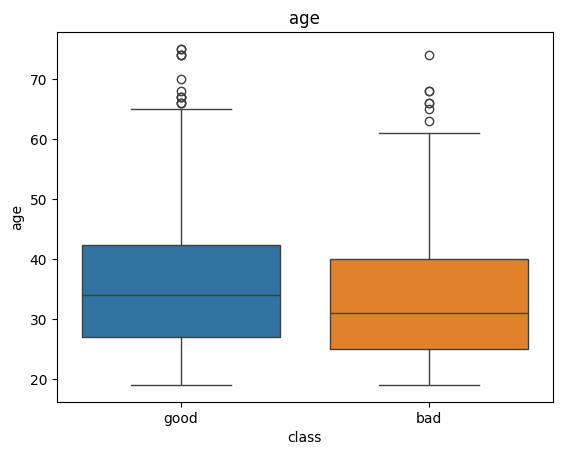

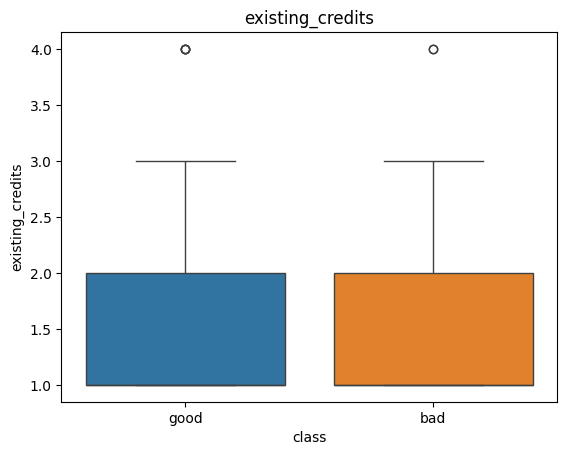

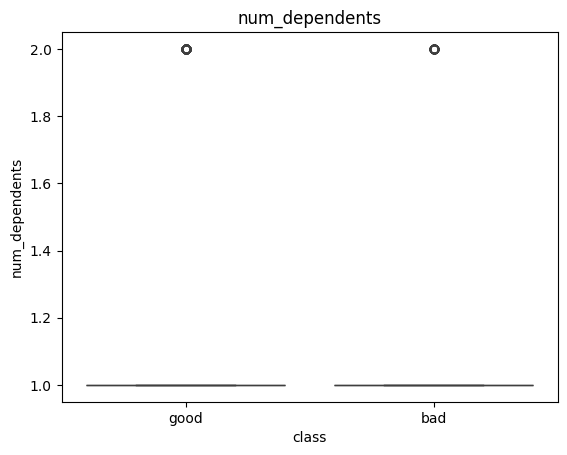

In [762]:
for col in customer_df.select_dtypes("int"):
    plt.title(col)
    sns.boxplot(x='class', y=col,data = customer_df, hue='class')
    plt.show()

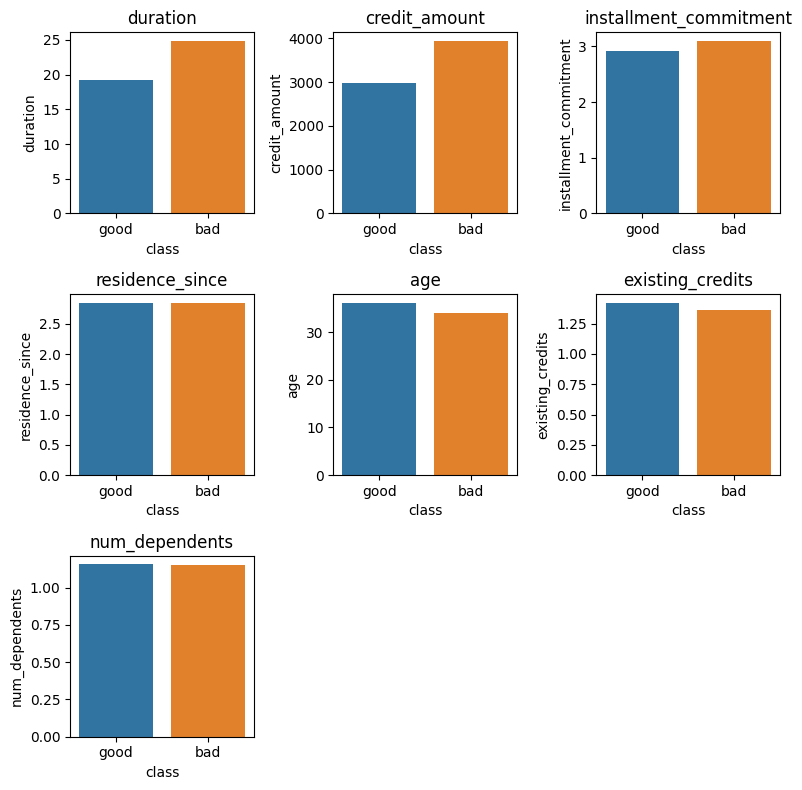

In [763]:
_,axs = plt.subplots(nrows=3,ncols=3,figsize = (8,8))
numerical_col = customer_df.select_dtypes("int").columns
for i,ax in enumerate(axs.flatten()):
    if i < len(numerical_col):
        sns.barplot(data=customer_df, x='class',y=numerical_col[i],hue='class',hue_order=['good','bad'],estimator="mean",ax=ax, errorbar = None)
        ax.set_title(numerical_col[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

### Some Insights (mean estimator is used for the above bar graph):
1. higher duration --> bad target
2. higher credit_amount --> bad target
3. more installment_commitment --> bad target
4. residence_since --> does not affect the target
5. age --> the older the person, the higher chance for a good target.
6. existing_credits --> does not affect the target.
7. num_dependets --> doe not affect the target

In [764]:
#customer_df[customer_df["class"]=="good"]["duration"].mean()

In [765]:
#customer_df[customer_df["class"] == "good"]["duration"].max()

In [766]:
#plt.bar(customer_df['class'],customer_df['duration'])
#plt.show()

        Categorical features

            Unique Values

In [767]:
for col in customer_df:
    if customer_df[col].dtype == 'object':
        print(f'{col} : {customer_df[col].unique()}')

checking_status : ['<0' '0<=X<200' 'no checking' nan '>=200']
credit_history : ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid' nan]
purpose : ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining' nan]
savings_status : ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500' nan]
employment : ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1' nan]
personal_status : ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties : ['none' 'guarantor' 'co applicant']
property_magnitude : ['real estate' 'life insurance' 'no known property' 'car' nan]
other_payment_plans : ['none' 'bank' 'stores']
housing : ['own' 'for free' 'rent' nan]
job : ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
own_telephone : ['yes' 'none']
foreign_worker : ['yes' 'no']
class : ['good' 'bad']


In [768]:
customer_df["checking_status"].where(customer_df["class"] == "bad").value_counts()

checking_status
<0             125
0<=X<200        92
no checking     43
>=200           12
Name: count, dtype: int64

In [769]:
customer_df["checking_status"].where(customer_df["class"] == "good").value_counts()

checking_status
no checking    318
0<=X<200       148
<0             125
>=200           46
Name: count, dtype: int64

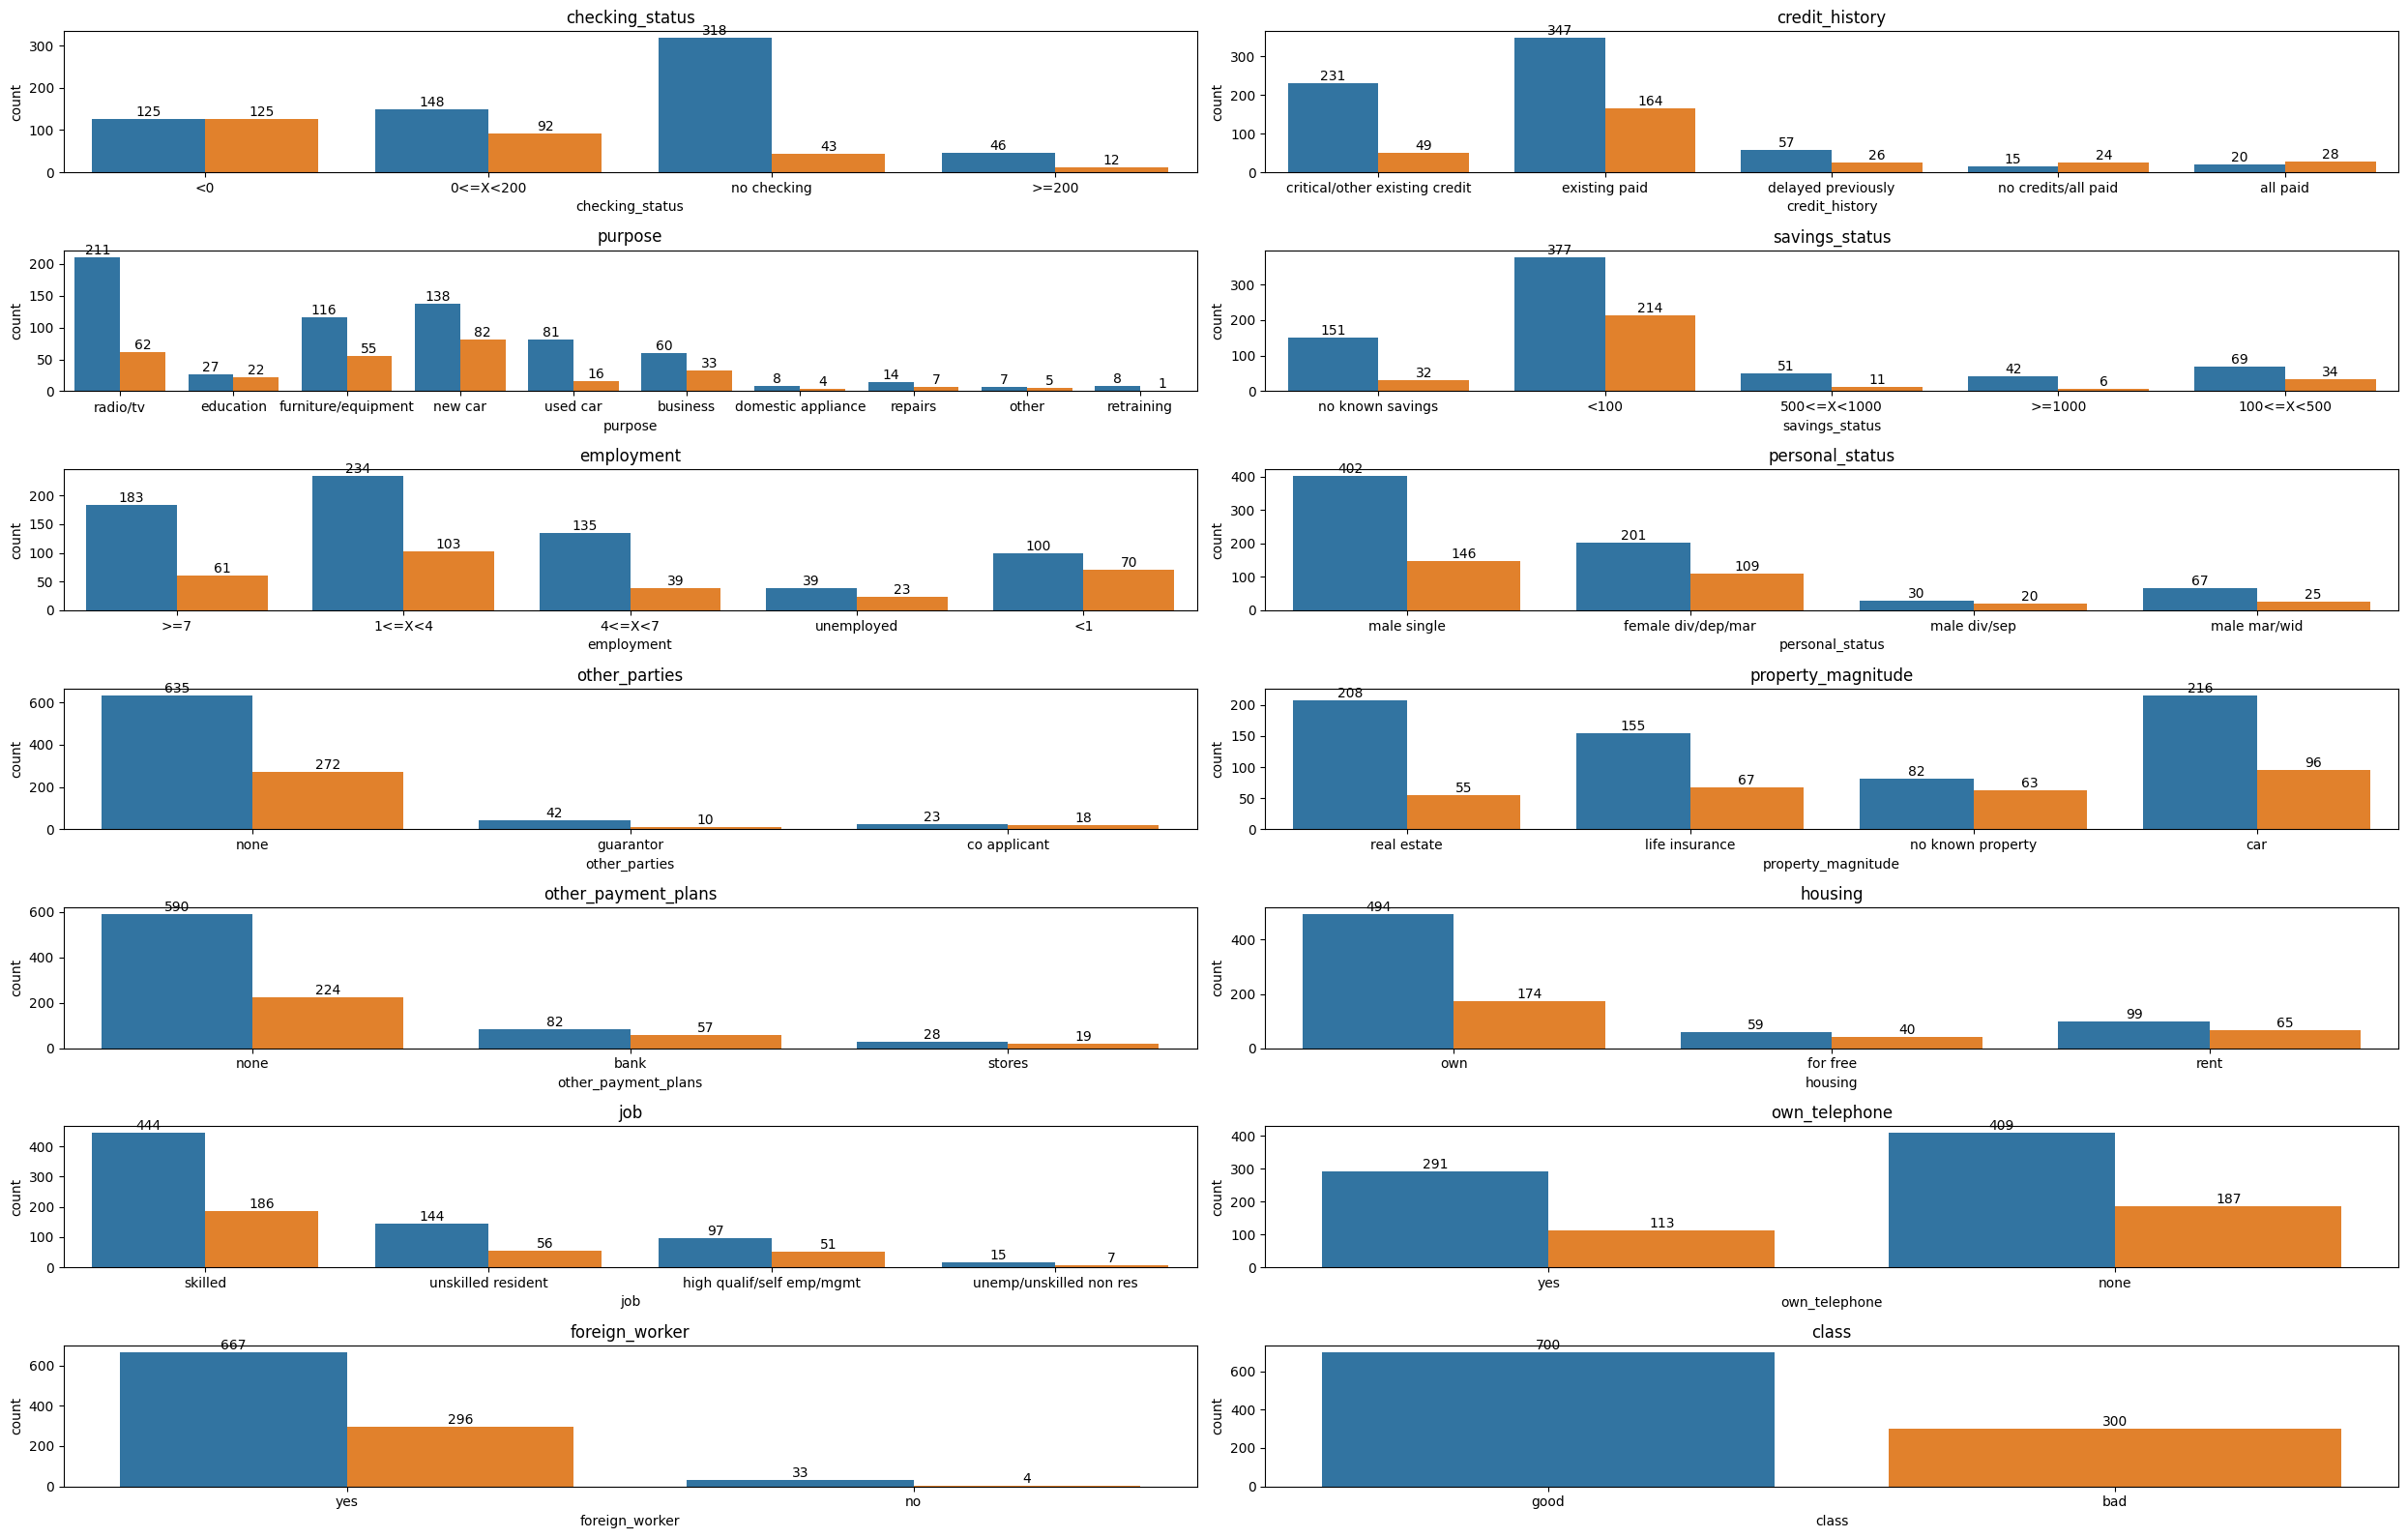

In [770]:
_,axs = plt.subplots(nrows = 7, ncols = 2, figsize = (25,16))
cat_cloumn = customer_df.select_dtypes('object').columns

for index,ax in enumerate(axs.flatten()):
    if index < len(cat_cloumn):
        sns.countplot(data = customer_df, x = cat_cloumn[index], hue = "class", ax = ax,legend=False)
        ax.set_title(cat_cloumn[index])
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])

        #plt.tick_params(axis='x',rotation = 45)

#plt.subplots_adjust(hspace=4)
plt.tight_layout()
plt.show()

### Insights for the previous plot:
1. Checking_status: Most of the good target are 'no_checking' with 318. where the most bad is '<0'
2. Credit_history: 
3. Purpose: most of the radio/tv have good target,
13. ost of the entries are foreign_worker = 963 entries, can not really tell how this feature affects the target.
14. data is in balanced with 700 good and 300 bad

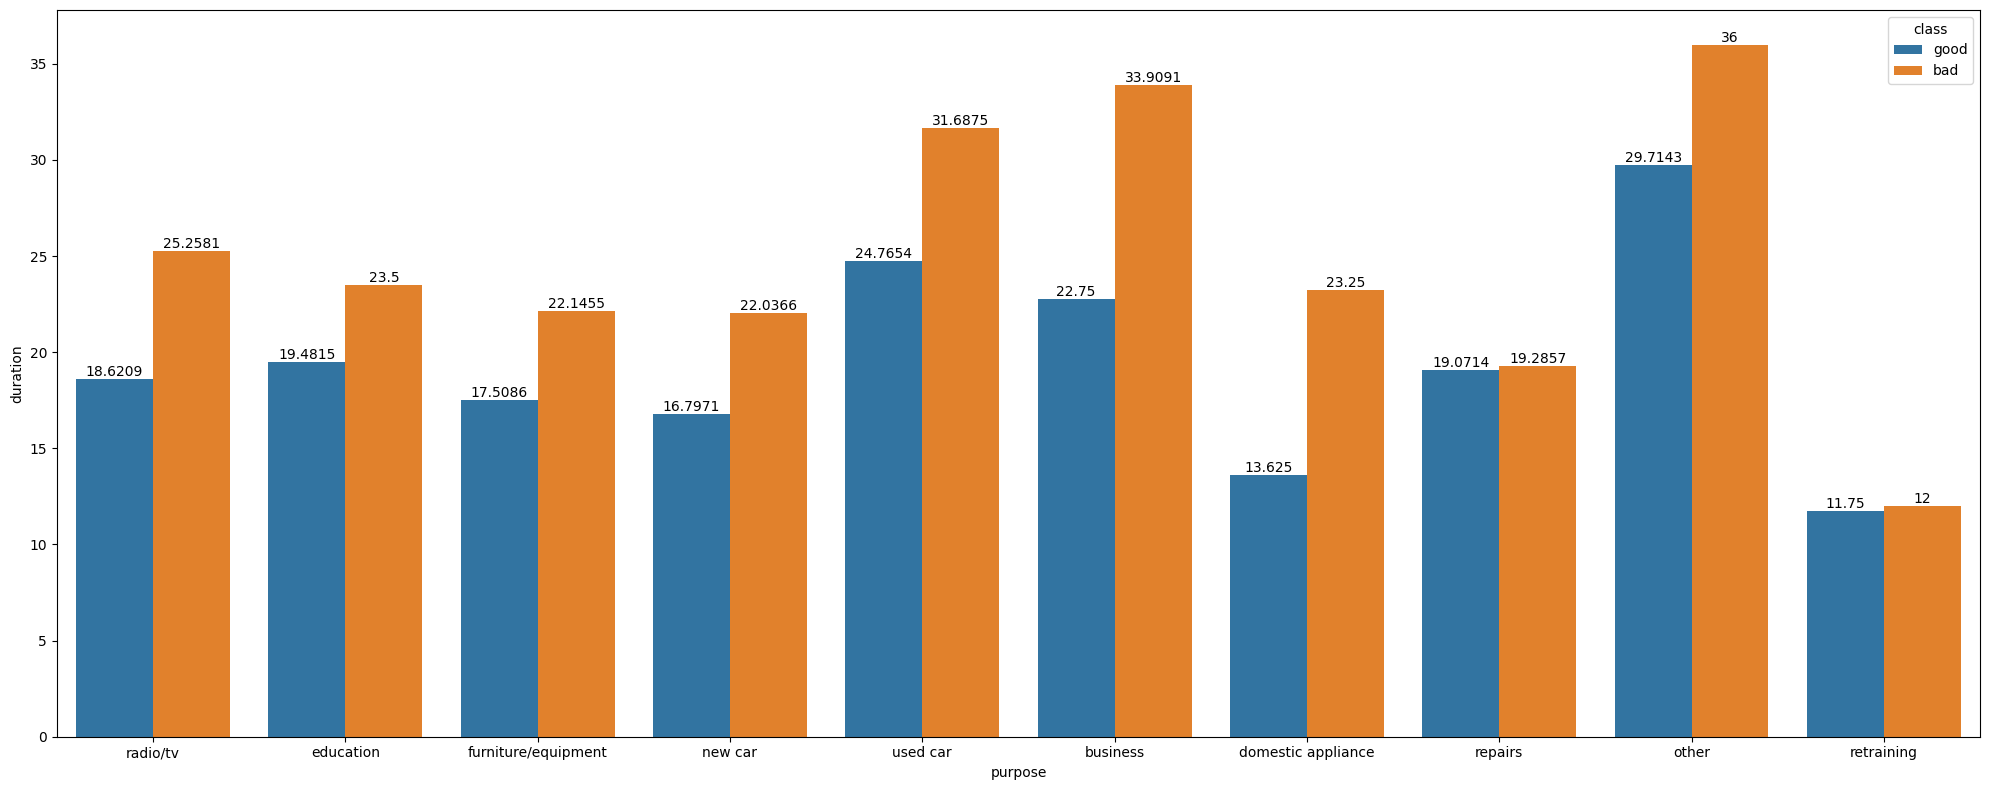

In [771]:
# sns.barplot(data = customer_df, x = 'duration', y = 'foreign_worker')
_,ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(data = customer_df, x = 'purpose', y = 'duration' , hue = 'class', estimator = 'mean', ax = ax, errorbar = None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.tight_layout()
plt.show()

### It is clear that for each purpose, the acceptable duraction is different. For example --> radio/tv has mean of 18.6209 for good targets and 25.2581 for bad targets. On the other hand domestic appliance has 13.625 for good and 23.25 for bad. From this insight we can know that for some purposes good target is guranteed for higher duration and bad target is reachable for lower duration 

In [772]:
customer_df["checking_status"].value_counts()

checking_status
no checking    361
<0             250
0<=X<200       240
>=200           58
Name: count, dtype: int64

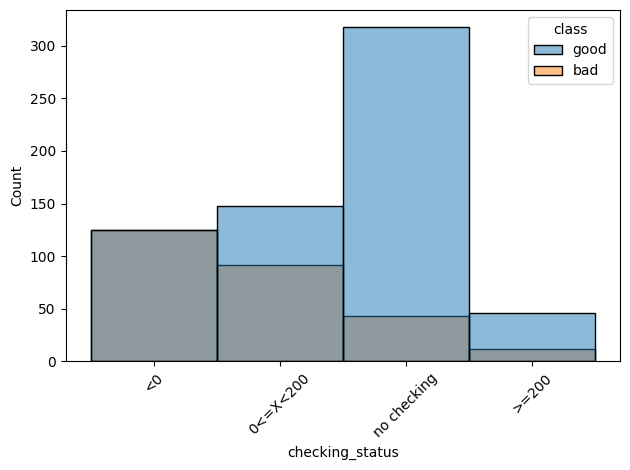

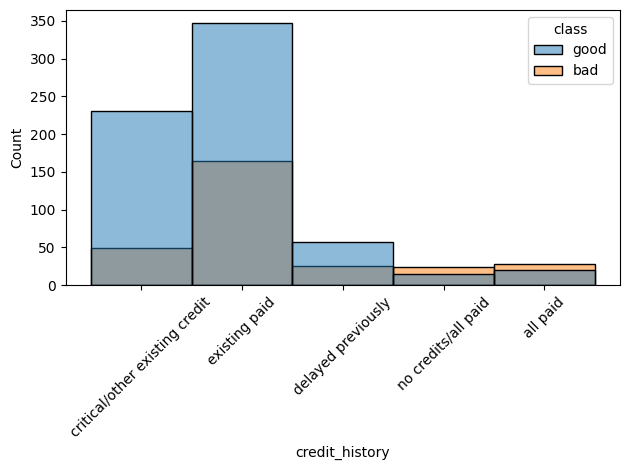

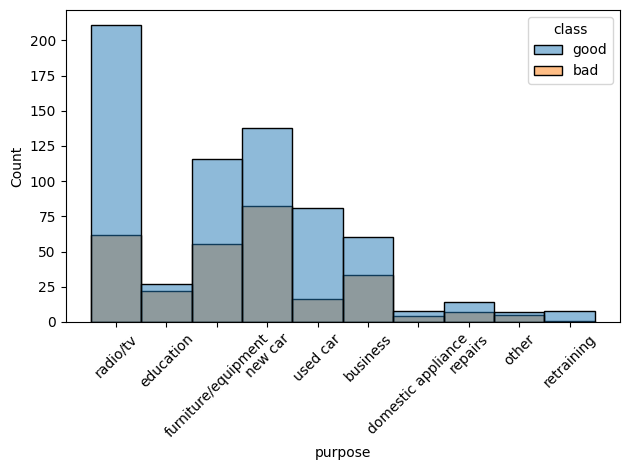

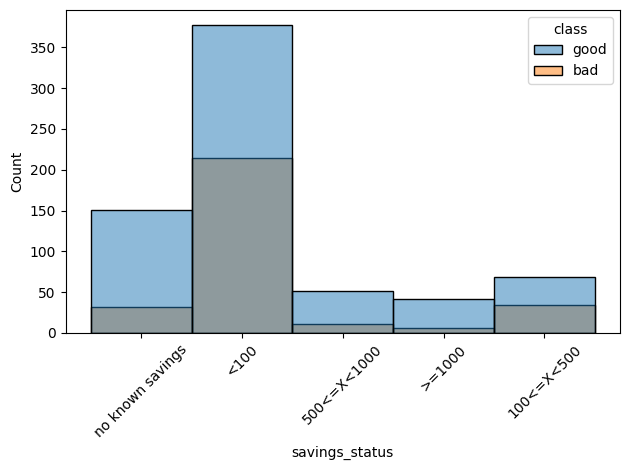

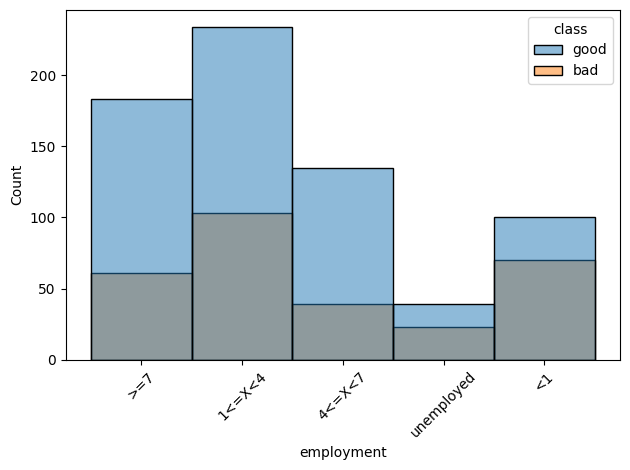

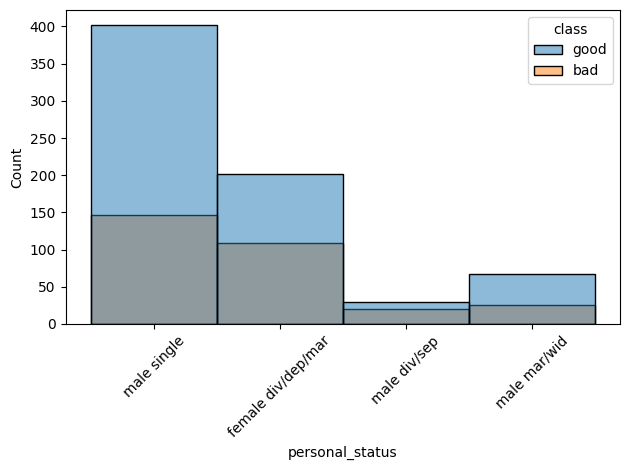

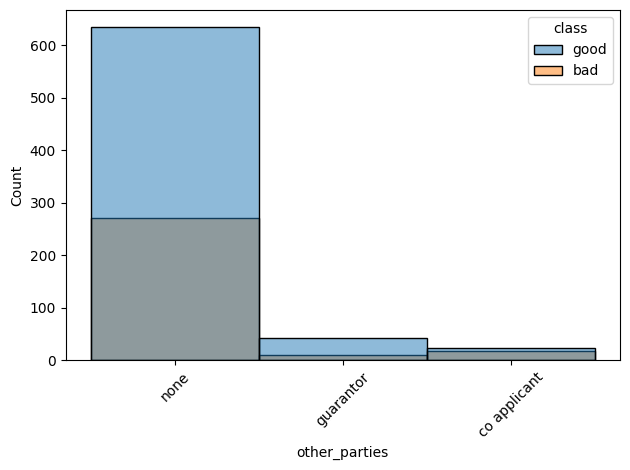

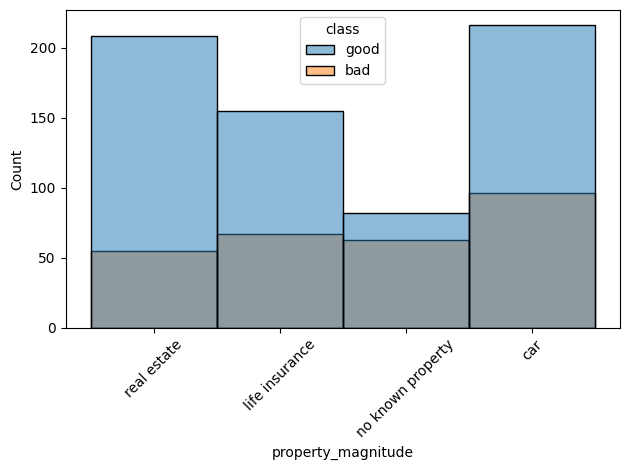

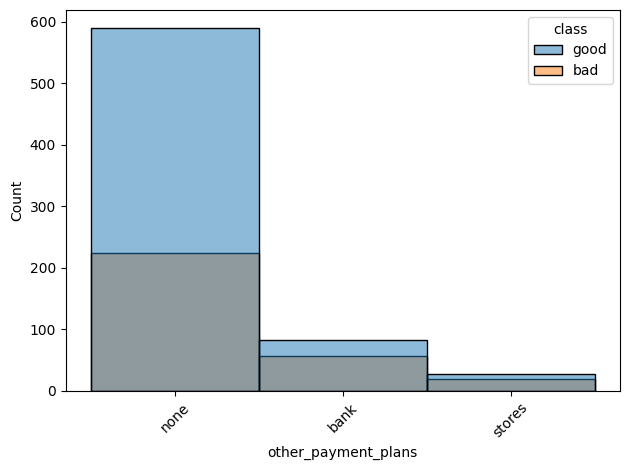

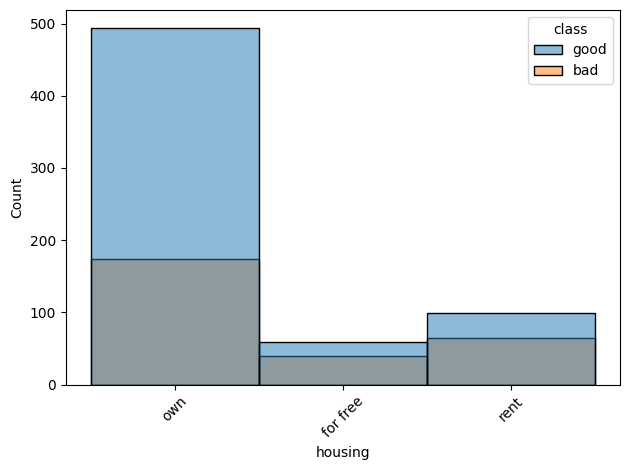

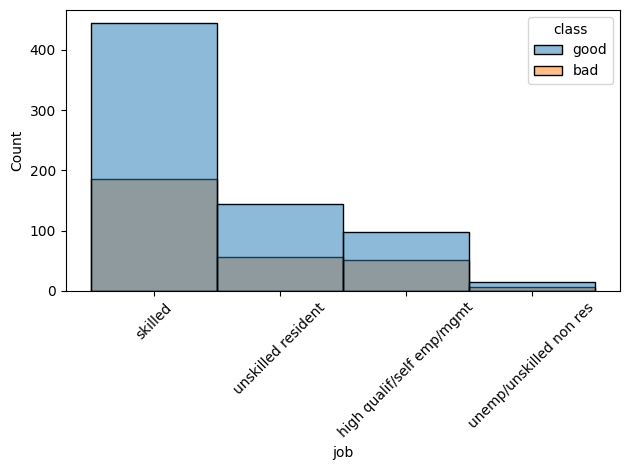

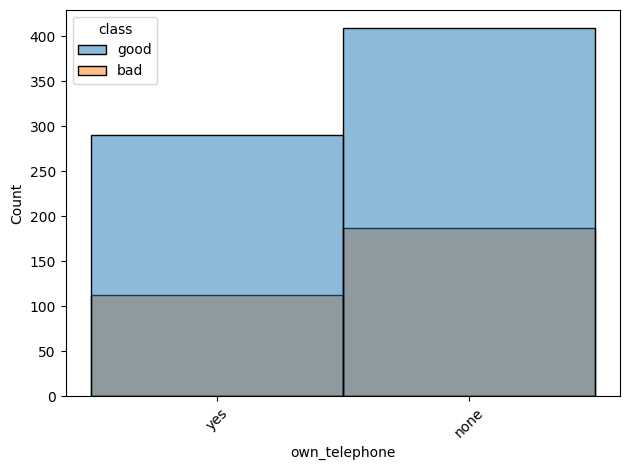

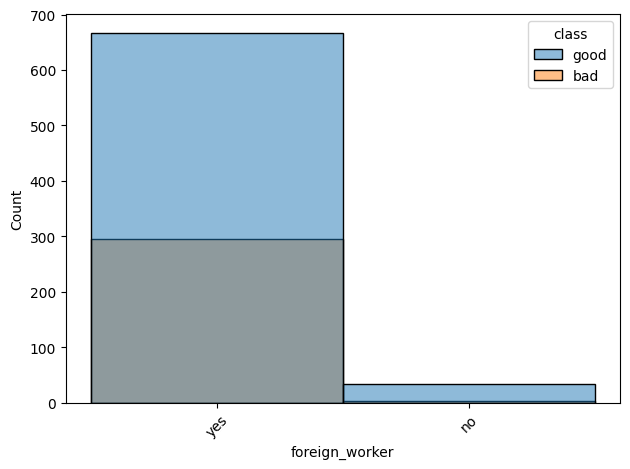

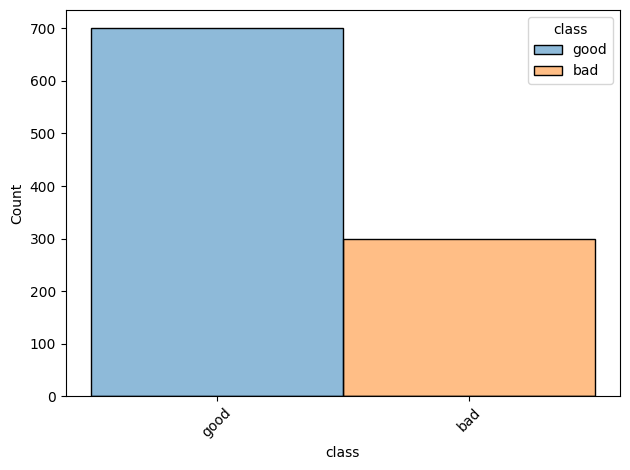

In [773]:
for col in customer_df.select_dtypes('object'):
    sns.histplot(data=customer_df, x=col, hue='class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

        Handling Missing values

In [774]:
customer_df.isnull().sum()

checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

### We have null values in 'checking_status = 91', 'credit_history = 39', 'purpose = 43', 'savings_status = 13', 'employment = 13', 'property_magnitude = 58', 'housing = 69'

In [775]:
customer_df_na = customer_df[customer_df.isna().any(axis = 1 )]
customer_df_na[customer_df[customer_df.isna().any(axis = 1 )].isna().sum(axis = 1) > 0]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
15,NaN,24,existing paid,radio/tv,1282,100<=X<500,1<=X<4,4,female div/dep/mar,none,...,car,32,none,own,1,unskilled resident,1,none,yes,bad
16,NaN,24,critical/other existing credit,radio/tv,2424,no known savings,>=7,4,male single,none,...,life insurance,53,none,own,2,skilled,1,none,yes,good
17,NaN,30,no credits/all paid,business,8072,no known savings,<1,2,male single,none,...,car,25,bank,own,3,skilled,1,none,yes,good
18,NaN,24,existing paid,used car,12579,<100,>=7,4,female div/dep/mar,none,...,no known property,44,none,for free,1,high qualif/self emp/mgmt,1,yes,yes,bad
35,NaN,45,critical/other existing credit,radio/tv,4746,<100,<1,4,male single,none,...,life insurance,25,none,own,2,unskilled resident,1,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,no checking,15,all paid,NaN,1569,100<=X<500,>=7,4,male single,none,...,car,34,bank,own,1,unskilled resident,2,none,yes,good
992,<0,18,existing paid,NaN,1936,no known savings,4<=X<7,2,male mar/wid,none,...,car,23,none,rent,2,unskilled resident,1,none,yes,good
993,<0,36,existing paid,NaN,3959,<100,unemployed,4,male single,none,...,life insurance,30,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
994,no checking,12,existing paid,NaN,2390,no known savings,>=7,4,male single,none,...,car,50,none,own,1,skilled,1,yes,yes,good


In [776]:
customer_df[customer_df['checking_status'].isna() == False]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,NaN,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [777]:
customer_df[customer_df['purpose'] == 'radio/tv'].isna().sum()

checking_status           27
duration                   0
credit_history            11
purpose                    0
credit_amount              0
savings_status             3
employment                 1
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        11
age                        0
other_payment_plans        0
housing                   15
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

### For Employment (Ordinal feature), KNNimpute will be used to fill the nans values with values from the near n-neighbours with high similarity

In [778]:
customer_df['employment'].value_counts()

employment
1<=X<4        337
>=7           244
4<=X<7        174
<1            170
unemployed     62
Name: count, dtype: int64

In [779]:
ordinal_encoder = OrdinalEncoder(categories=[['unemployed', '<1','1<=X<4', '4<=X<7', '>=7']], handle_unknown = 'use_encoded_value', unknown_value = -1, dtype = int )
customer_df['employment'] = ordinal_encoder.fit_transform(customer_df[['employment']])

In [780]:
customer_df['employment'].value_counts()

employment
 2    337
 4    244
 3    174
 1    170
 0     62
-1     13
Name: count, dtype: int64

In [781]:
imputer = KNNImputer(n_neighbors = 1, missing_values = -1)
df_imputed = imputer.fit_transform(customer_df[['employment','age','credit_amount','residence_since']])

In [782]:
customer_df['employment'] = pd.DataFrame(df_imputed, dtype = int)[0]
customer_df['employment'].value_counts()

employment
2    340
4    251
3    176
1    170
0     63
Name: count, dtype: int64

### Handle savings_status the same as employment

In [783]:
customer_df['savings_status'].value_counts()

savings_status
<100                591
no known savings    183
100<=X<500          103
500<=X<1000          62
>=1000               48
Name: count, dtype: int64

In [784]:
ordinal_encoder = OrdinalEncoder(categories = [['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']], handle_unknown = 'use_encoded_value', unknown_value = -1, dtype = int)

In [785]:
customer_df['savings_status'] = ordinal_encoder.fit_transform(customer_df[['savings_status']])

In [786]:
customer_df['savings_status'].value_counts()

savings_status
 1    591
 0    183
 2    103
 3     62
 4     48
-1     13
Name: count, dtype: int64

In [787]:
imputer = KNNImputer(n_neighbors = 1, missing_values = -1)
df_imputed = imputer.fit_transform(customer_df[['savings_status','age','credit_amount','residence_since']])

In [788]:
customer_df['savings_status'] = pd.DataFrame(df_imputed, dtype=int)[0]
customer_df['savings_status'].value_counts()

savings_status
1    601
0    184
2    104
3     62
4     49
Name: count, dtype: int64

### For credit history (nominal feature) other methods like most frequent value can be used.
### note : existing paid is very frequent compared to other categories(dominant)

In [789]:
customer_df['credit_history'].value_counts()

credit_history
existing paid                     511
critical/other existing credit    280
delayed previously                 83
all paid                           48
no credits/all paid                39
Name: count, dtype: int64

In [790]:
imputer = SimpleImputer(strategy="most_frequent")

In [791]:
df_imputed = imputer.fit_transform(customer_df[['credit_history']])

In [792]:
customer_df['credit_history'] = pd.DataFrame(df_imputed)

In [793]:
customer_df['credit_history'].value_counts()

credit_history
existing paid                     550
critical/other existing credit    280
delayed previously                 83
all paid                           48
no credits/all paid                39
Name: count, dtype: int64

### housing will be handled the same as cred_history.
### most frequent value is own

In [794]:
customer_df['housing'].value_counts()

housing
own         668
rent        164
for free     99
Name: count, dtype: int64

In [795]:
imputer = SimpleImputer(strategy="most_frequent")
df_imputed = imputer.fit_transform(customer_df[['housing']])
customer_df['housing'] = pd.DataFrame(df_imputed)
customer_df['housing'].value_counts()

housing
own         737
rent        164
for free     99
Name: count, dtype: int64

### For property_magnitude KNNImputer will be used since all the categories are near in size, so no value is frequent than the others. Backward/Forward Fill is not also recommended , since no relation between each row with the previous or next row

In [796]:
customer_df['property_magnitude'].value_counts()

property_magnitude
car                  312
real estate          263
life insurance       222
no known property    145
Name: count, dtype: int64

In [797]:
encoder = LabelEncoder()
customer_df['property_magnitude'] = encoder.fit_transform(customer_df['property_magnitude'])

In [798]:
customer_df['property_magnitude'].value_counts()

property_magnitude
0    312
3    263
1    222
2    145
4     58
Name: count, dtype: int64

In [799]:
imputer = KNNImputer(n_neighbors = 1, missing_values = 4)

In [800]:
df = imputer.fit_transform(customer_df[['property_magnitude','age','credit_amount','residence_since']])

In [801]:
customer_df['property_magnitude'] = pd.DataFrame(df, dtype=int)[0]

In [802]:
customer_df['property_magnitude'].value_counts()

property_magnitude
0    326
3    281
1    236
2    157
Name: count, dtype: int64

### Checking Status

In [803]:
customer_df['checking_status'].value_counts()

checking_status
no checking    361
<0             250
0<=X<200       240
>=200           58
Name: count, dtype: int64

In [804]:
encoder = LabelEncoder()
customer_df['checking_status'] = encoder.fit_transform(customer_df['checking_status'])

In [805]:
customer_df['checking_status'].value_counts() # value with labeled to 4 are the missing values with 91 value

checking_status
3    361
1    250
0    240
4     91
2     58
Name: count, dtype: int64

In [806]:
imputer = SimpleImputer(missing_values=4, strategy='most_frequent')
customer_df['checking_status'] = imputer.fit_transform(customer_df[['checking_status']])

In [807]:
customer_df['checking_status'].value_counts()

checking_status
3    452
1    250
0    240
2     58
Name: count, dtype: int64

### Purpose

In [808]:
customer_df['purpose'].value_counts()

purpose
radio/tv               273
new car                220
furniture/equipment    171
used car                97
business                93
education               49
repairs                 21
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64

In [809]:
encoder = LabelEncoder()
customer_df['purpose'] = encoder.fit_transform(customer_df['purpose'])

In [810]:
customer_df['purpose'].value_counts() # value with labeled to 10 are the missing values with 43 value

purpose
6     273
4     220
3     171
9      97
0      93
2      49
10     43
7      21
1      12
5      12
8       9
Name: count, dtype: int64

In [811]:
imputer = SimpleImputer(missing_values=10, strategy='most_frequent')
customer_df['purpose'] = imputer.fit_transform(customer_df[['purpose']])


In [812]:
customer_df['purpose'].value_counts()

purpose
6    316
4    220
3    171
9     97
0     93
2     49
7     21
1     12
5     12
8      9
Name: count, dtype: int64

        Check duplicated Data

In [813]:
customer_df.duplicated().sum()

0

### There are no duplicated rows

        Handle Categorical Data

In [814]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   int64 
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   int64 
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   int64 
 6   employment              1000 non-null   int64 
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   int64 
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [815]:
customer_df.select_dtypes('object').head()

,credit_history,personal_status,other_parties,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,critical/other existing credit,male single,none,none,own,skilled,yes,yes,good
1,existing paid,female div/dep/mar,none,none,own,skilled,none,yes,bad
2,critical/other existing credit,male single,none,none,own,unskilled resident,none,yes,good
3,existing paid,male single,guarantor,none,for free,skilled,none,yes,good
4,delayed previously,male single,none,none,for free,skilled,none,yes,bad


In [816]:
customer_df.select_dtypes('object').isnull().sum()

credit_history         0
personal_status        0
other_parties          0
other_payment_plans    0
housing                0
job                    0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

### It is clear that all the categorical columns are nominal, so Labelencoder or one hot encoder can be use.
### In this case Labelencoder will be usd so that the feature stay the same.

In [817]:
encoder = LabelEncoder()

In [818]:
for col in customer_df.select_dtypes('object'):
    customer_df[col] = encoder.fit_transform(customer_df[col])

In [819]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   checking_status         1000 non-null   int64
 1   duration                1000 non-null   int64
 2   credit_history          1000 non-null   int64
 3   purpose                 1000 non-null   int64
 4   credit_amount           1000 non-null   int64
 5   savings_status          1000 non-null   int64
 6   employment              1000 non-null   int64
 7   installment_commitment  1000 non-null   int64
 8   personal_status         1000 non-null   int64
 9   other_parties           1000 non-null   int64
 10  residence_since         1000 non-null   int64
 11  property_magnitude      1000 non-null   int64
 12  age                     1000 non-null   int64
 13  other_payment_plans     1000 non-null   int64
 14  housing                 1000 non-null   int64
 15  existing_credits      

### Outlier handling

In [820]:
customer_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,0,4,4,3,2,...,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,1,2,2,0,2,...,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,1,3,2,3,2,...,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,1,3,2,3,1,...,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,1,2,3,3,2,...,2,53,1,0,2,1,2,0,1,0


        Outlier Visualization

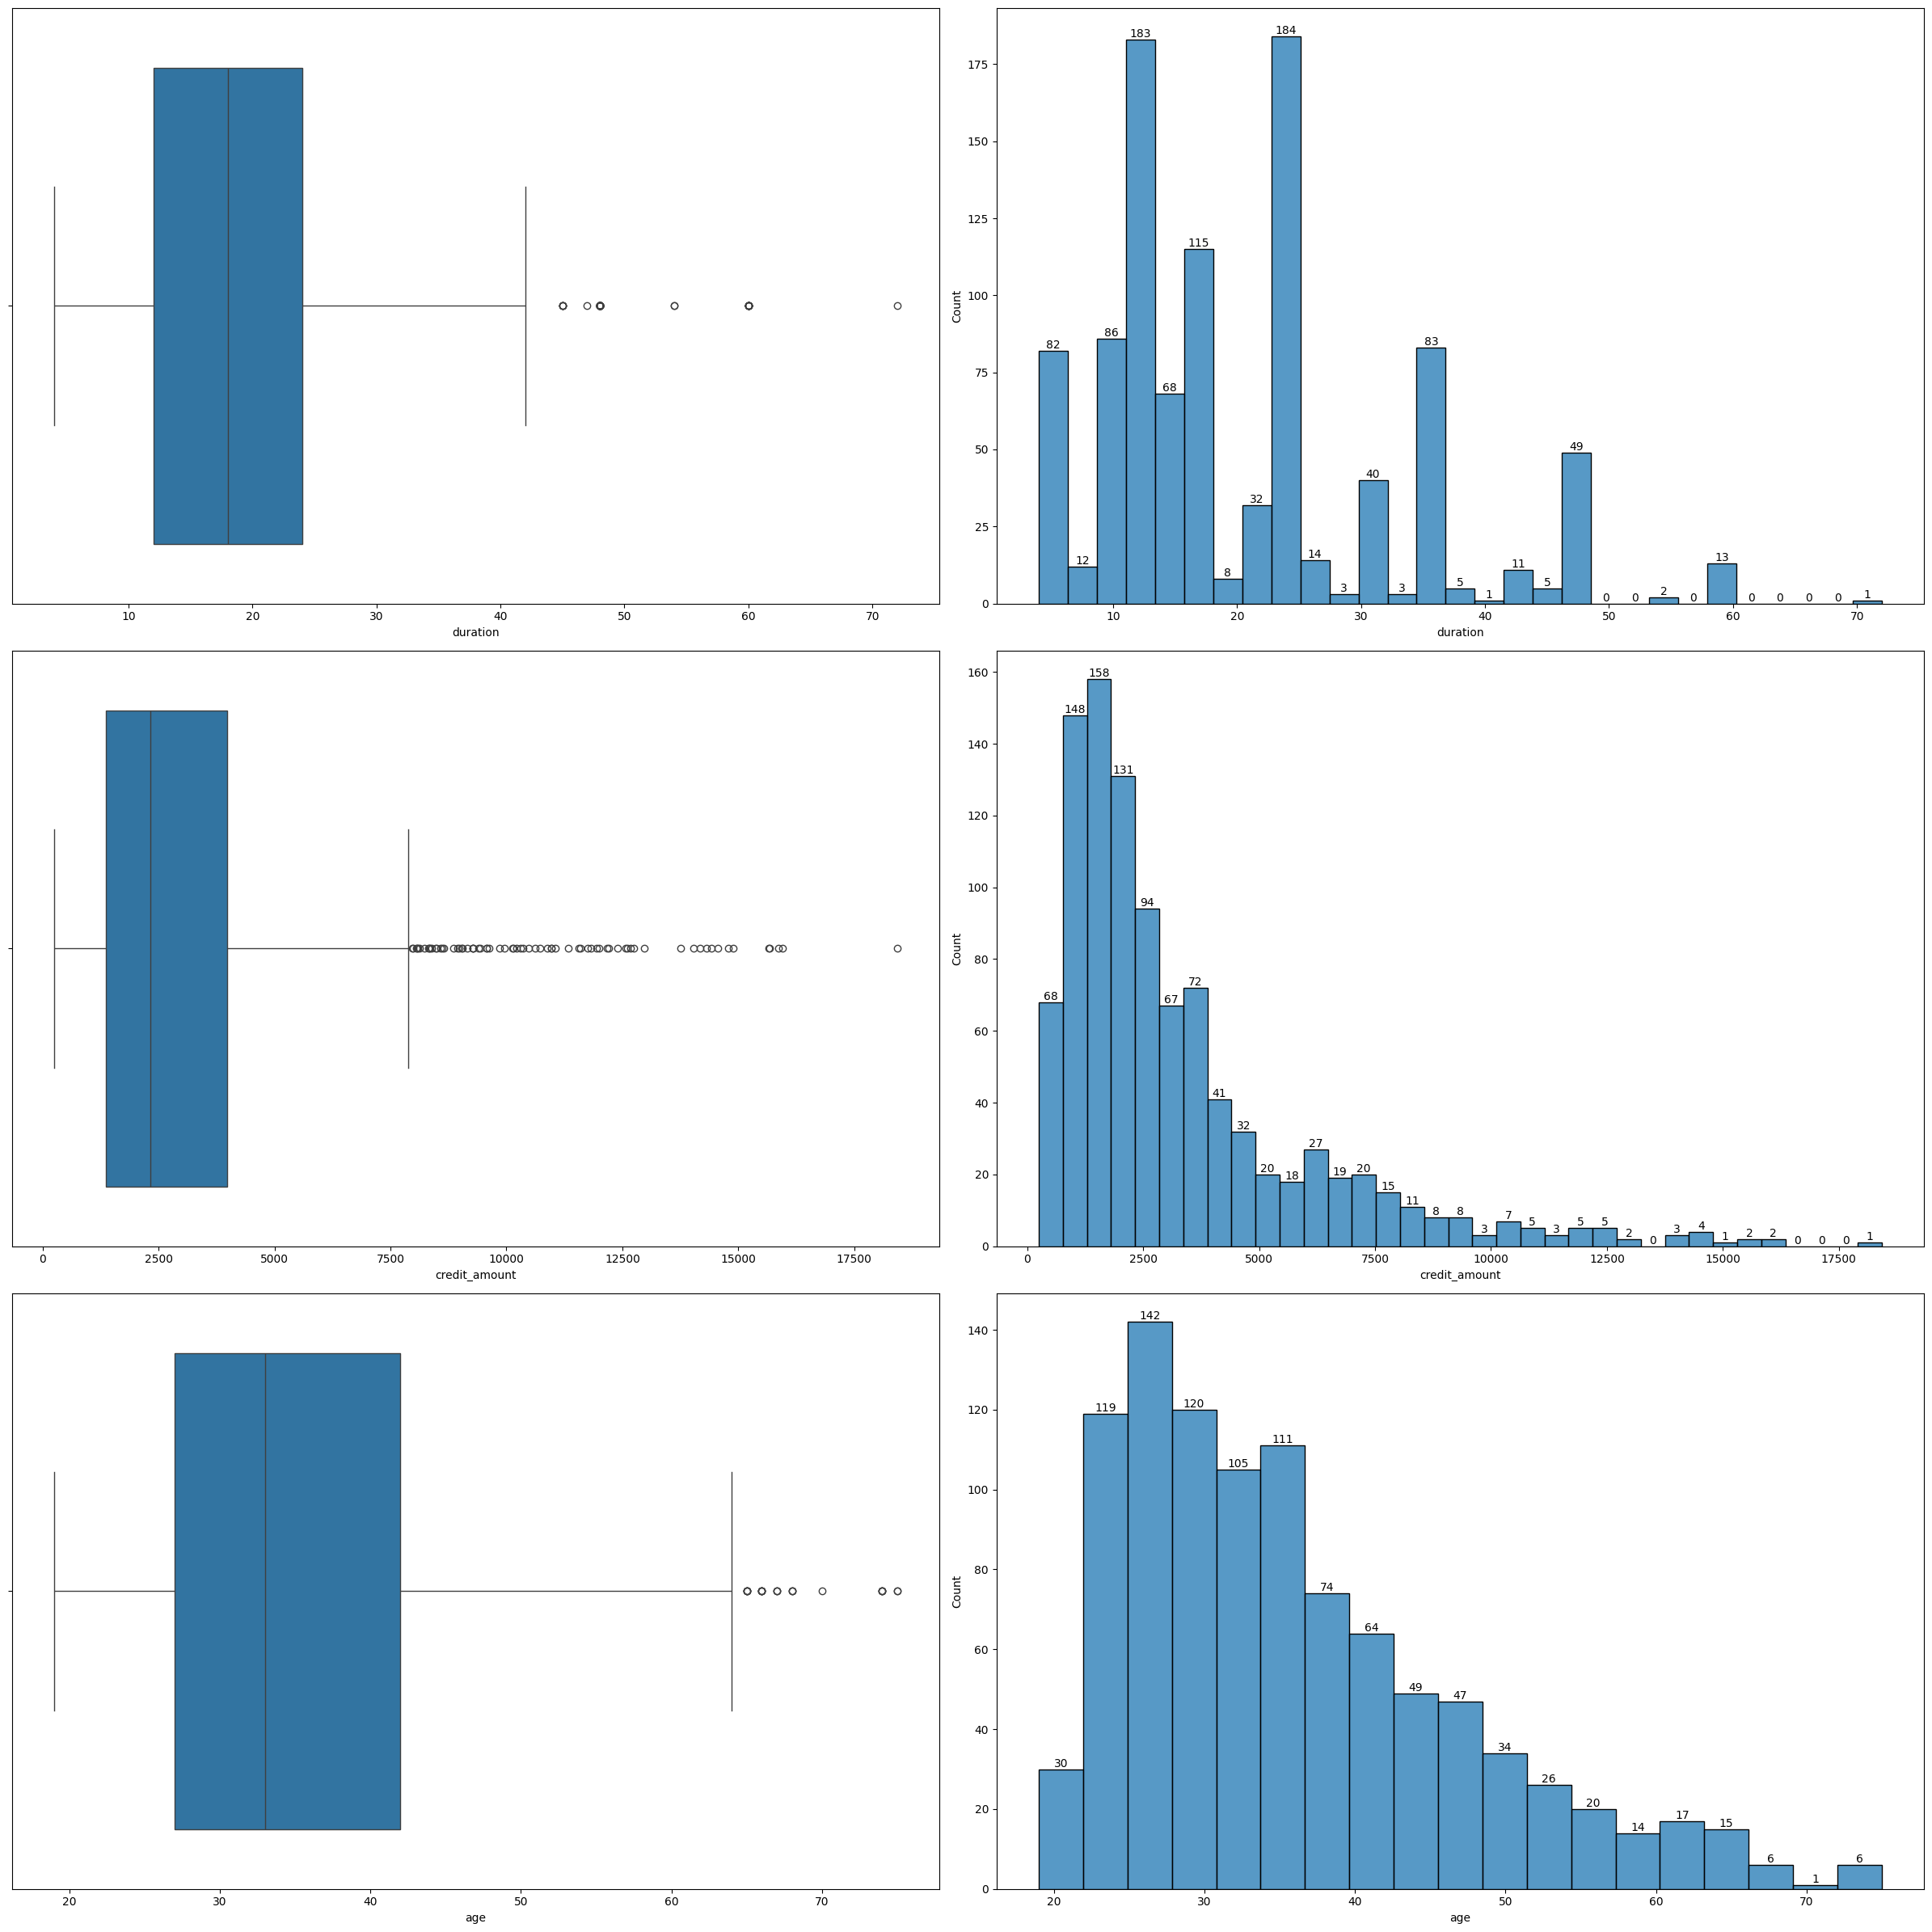

In [821]:
_,axs = plt.subplots(3,2, figsize=(24,24))
cols = ['duration', 'credit_amount', 'age']
#axs = axs.flatten()
for i,col in enumerate(cols):
    sns.boxplot(data=customer_df, x = col, ax = axs[i][0],legend=False)
    ax = sns.histplot(data=customer_df, x = col, ax = axs[i][1], legend=True )
    ax.bar_label(ax.containers[0])
        
plt.tight_layout()
plt.show()

In [822]:
customer_df['existing_credits'].value_counts()

existing_credits
1    633
2    333
3     28
4      6
Name: count, dtype: int64

        Outliers detection using Statistical methods

#### using IQR

In [823]:
col_bound = {}
for col in ['duration', 'credit_amount', 'age']:
    q1 = customer_df[col].quantile(0.25)
    q2 = customer_df[col].quantile(0.75)
    iqr = q2 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q2 + 1.5 * iqr
    col_bound[col] = {'lower_bound':lower_bound, 'upper_bound':upper_bound}

### duration 

In [824]:
customer_df[customer_df['duration'] > col_bound['duration']['upper_bound']]['duration'].value_counts()

duration
48    48
60    13
45     5
54     2
47     1
72     1
Name: count, dtype: int64

### credit_amount

##### The long tail is very clear in the histogram plot. Capping could be suitable

In [825]:
customer_df[customer_df['credit_amount'] > col_bound['credit_amount']['upper_bound']]['credit_amount'].value_counts()

credit_amount
9055     1
8072     1
8065     1
12680    1
14179    1
        ..
10127    1
9960     1
9398     1
10722    1
8229     1
Name: count, Length: 72, dtype: int64

In [826]:
customer_df[customer_df['age'] > col_bound['age']['upper_bound']]['age'].value_counts()

age
66    5
65    5
74    4
67    3
68    3
75    2
70    1
Name: count, dtype: int64

##### using zscore

In [827]:
customer_df[zscore(customer_df['duration']).abs() > 1.6]['duration'].shape


(81,)

In [828]:
customer_df[zscore(customer_df['credit_amount']).abs() > 1.6]['credit_amount'].shape

(77,)

In [829]:
customer_df[zscore(customer_df['age']).abs() > 1.6]['age'].shape

(89,)

#### Duration


In [830]:
duration_scaler = RobustScaler()
duration_df = pd.DataFrame(duration_scaler.fit_transform(customer_df[['duration']]), columns=['duration'])

duration_scaler = StandardScaler()
duration_df_standard_scaler = pd.DataFrame(duration_scaler.fit_transform(customer_df[['duration']]), columns=['duration'])

duration_scaler = FunctionTransformer(np.log1p)
duration_df_logtransformer = pd.DataFrame(duration_scaler.fit_transform(customer_df[['duration']]), columns=['duration'])

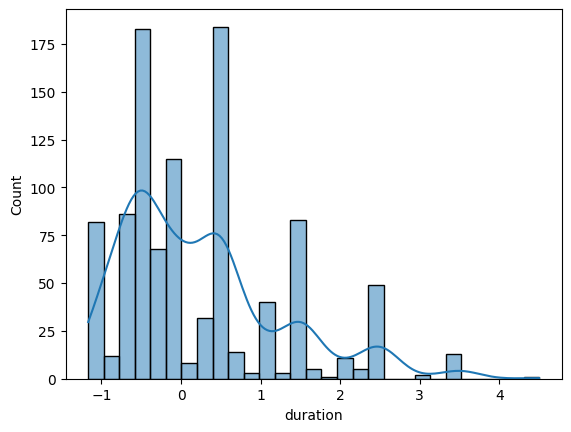

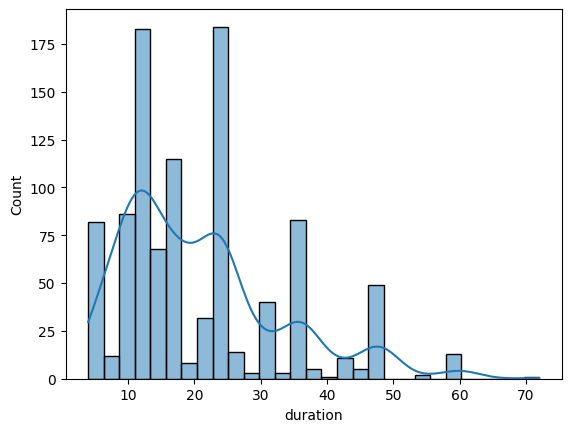

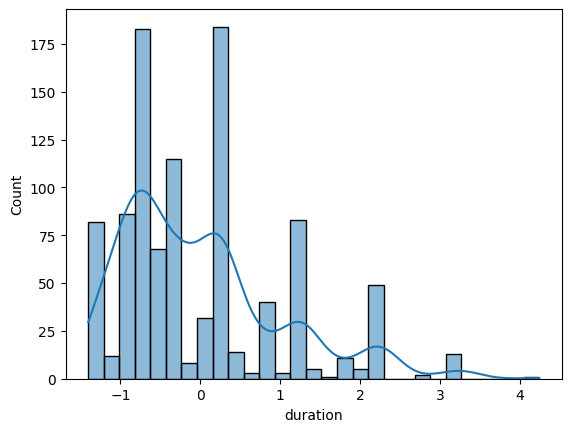

<Axes: xlabel='duration', ylabel='Count'>

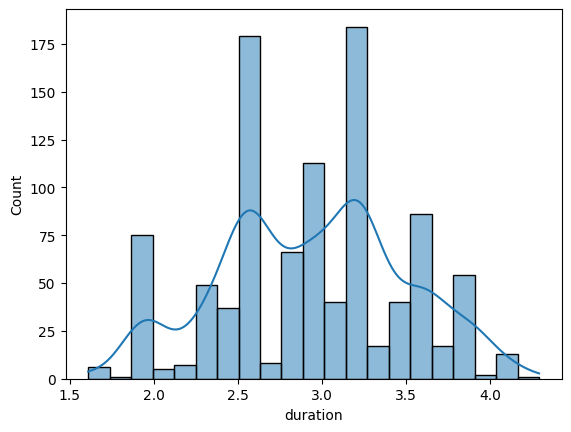

In [831]:
sns.histplot(data=duration_df,x='duration',kde=True)
plt.show()
sns.histplot(data=customer_df,x='duration',kde=True)
plt.show()
sns.histplot(data=duration_df_standard_scaler,x='duration',kde=True)
plt.show()
sns.histplot(data=duration_df_logtransformer,x='duration',kde=True)


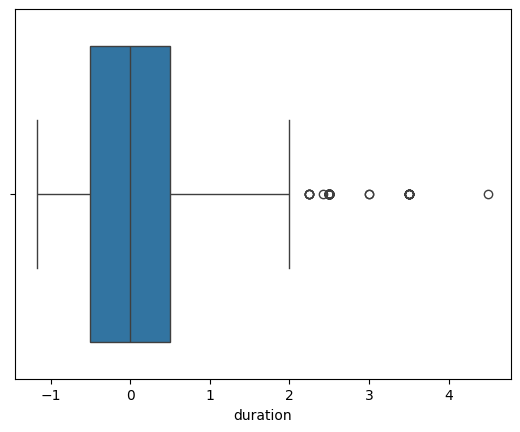

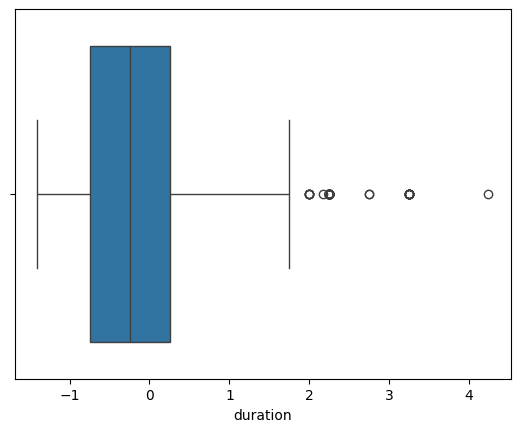

<Axes: xlabel='duration'>

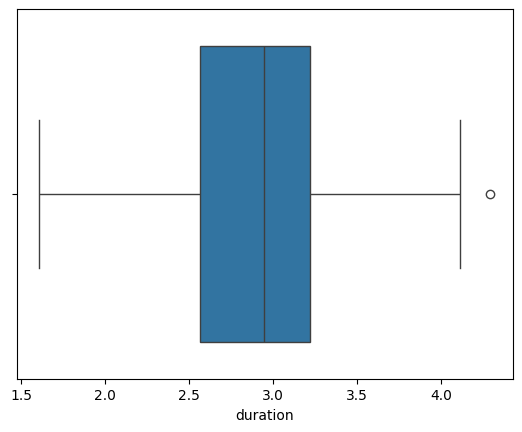

In [832]:
sns.boxplot(data=duration_df,x='duration')
plt.show()
sns.boxplot(data=duration_df_standard_scaler,x='duration')
plt.show()
sns.boxplot(data=duration_df_logtransformer,x='duration')

In [833]:
customer_df.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.72,20.90,2.25,4.55,3271.26,1.19,2.38,2.97,1.88,1.87,...,1.39,35.55,0.91,1.06,1.41,1.27,1.16,0.40,0.96,0.70
std,1.26,12.06,1.06,2.39,2822.74,0.97,1.21,1.12,1.35,0.45,...,1.21,11.38,0.42,0.51,0.58,0.95,0.36,0.49,0.19,0.46
min,0.00,4.00,0.00,0.00,250.00,0.00,0.00,1.00,0.00,0.00,...,0.00,19.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,12.00,1.00,3.00,1365.50,1.00,2.00,2.00,0.00,2.00,...,0.00,27.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00
50%,2.00,18.00,3.00,4.00,2319.50,1.00,2.00,3.00,3.00,2.00,...,1.00,33.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
75%,3.00,24.00,3.00,6.00,3972.25,1.00,4.00,4.00,3.00,2.00,...,3.00,42.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
max,3.00,72.00,4.00,9.00,18424.00,4.00,4.00,4.00,3.00,2.00,...,3.00,75.00,2.00,2.00,4.00,3.00,2.00,1.00,1.00,1.00


In [834]:
duration_df.describe()

,duration
count,1000.00
mean,0.24
std,1.00
min,-1.17
25%,-0.50
50%,0.00
75%,0.50
max,4.50


In [835]:
duration_df_standard_scaler.describe()

,duration
count,1000.00
mean,0.00
std,1.00
min,-1.40
25%,-0.74
50%,-0.24
75%,0.26
max,4.24


In [836]:
duration_df_logtransformer.describe()

,duration
count,1000.00
mean,2.94
std,0.55
min,1.61
25%,2.56
50%,2.94
75%,3.22
max,4.29


#### Credit_amount

In [837]:
scaler = RobustScaler()
credit_amount_df = pd.DataFrame(scaler.fit_transform(customer_df[['credit_amount']]), columns=['credit_amount'])

scaler = StandardScaler()
credit_amount_df_standard_scaler = pd.DataFrame(scaler.fit_transform(customer_df[['credit_amount']]), columns=['credit_amount'])

scaler = FunctionTransformer(np.log1p)
credit_amount_df_logtransformer = pd.DataFrame(scaler.fit_transform(customer_df[['credit_amount']]), columns=['credit_amount'])

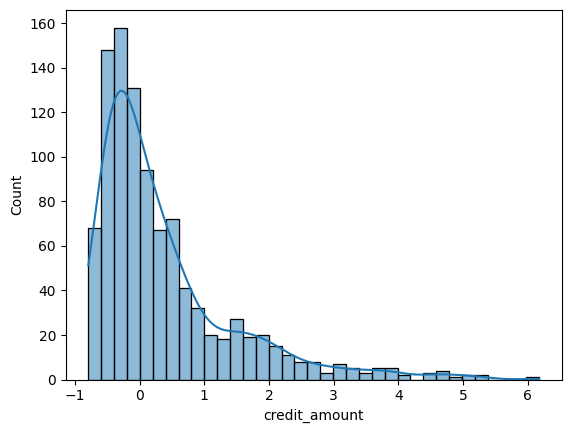

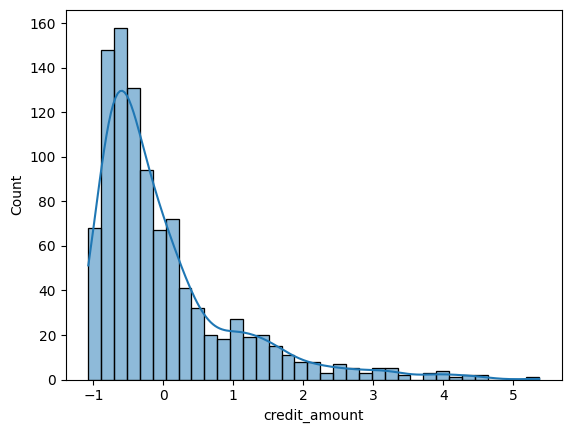

<Axes: xlabel='credit_amount', ylabel='Count'>

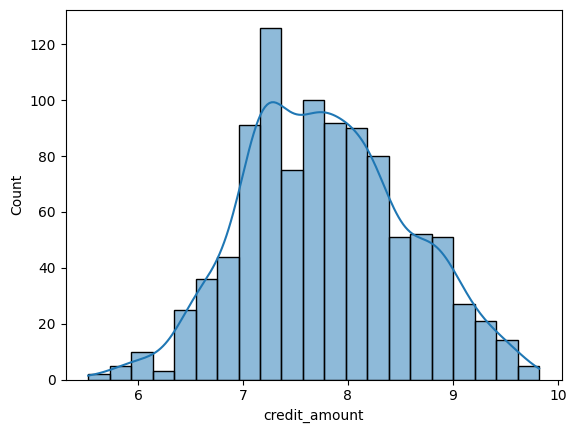

In [838]:
sns.histplot(data=credit_amount_df,x='credit_amount',kde=True)
plt.show()
sns.histplot(data=credit_amount_df_standard_scaler,x='credit_amount',kde=True)
plt.show()
sns.histplot(data=credit_amount_df_logtransformer,x='credit_amount',kde=True)

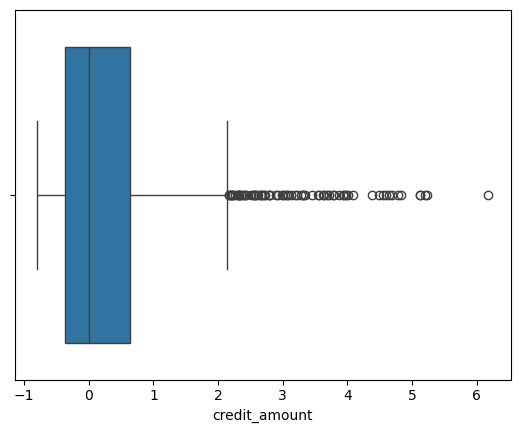

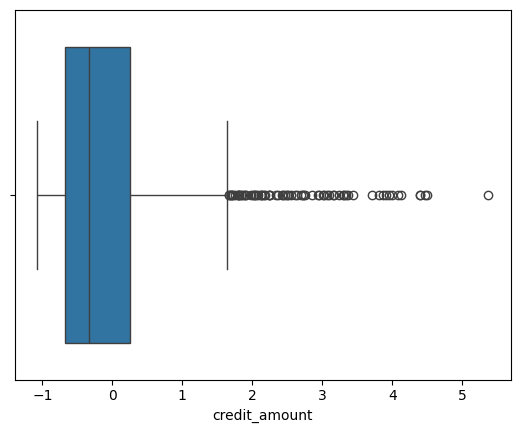

<Axes: xlabel='credit_amount'>

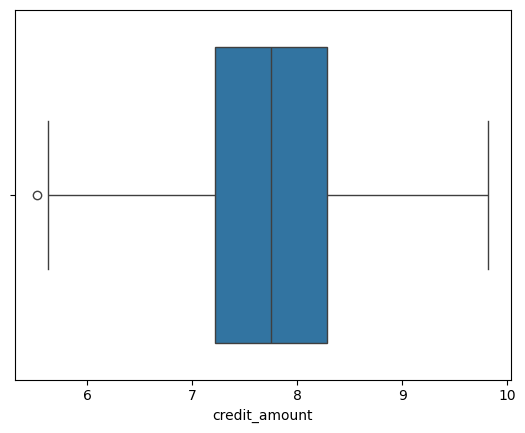

In [839]:
sns.boxplot(data=credit_amount_df,x='credit_amount')
plt.show()
sns.boxplot(data=credit_amount_df_standard_scaler,x='credit_amount')
plt.show()
sns.boxplot(data=credit_amount_df_logtransformer,x='credit_amount')

#### age

In [840]:
scaler = RobustScaler()
age_df = pd.DataFrame(scaler.fit_transform(customer_df[['age']]), columns=['age'])

scaler = StandardScaler()
age_df_scaler_transform = pd.DataFrame(scaler.fit_transform(customer_df[['age']]), columns=['age'])

scaler = FunctionTransformer(np.log1p)
age_df_logtransformer = pd.DataFrame(scaler.fit_transform(customer_df[['age']]), columns=['age'])

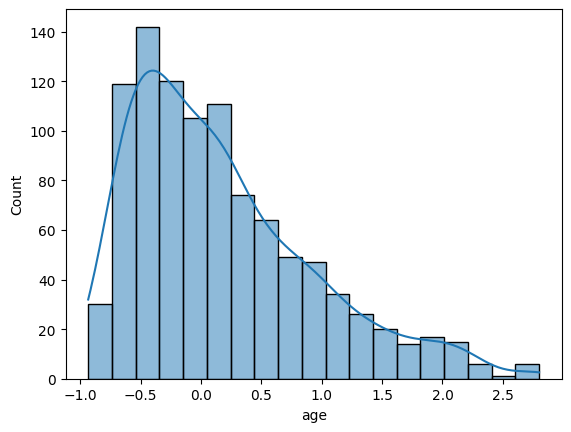

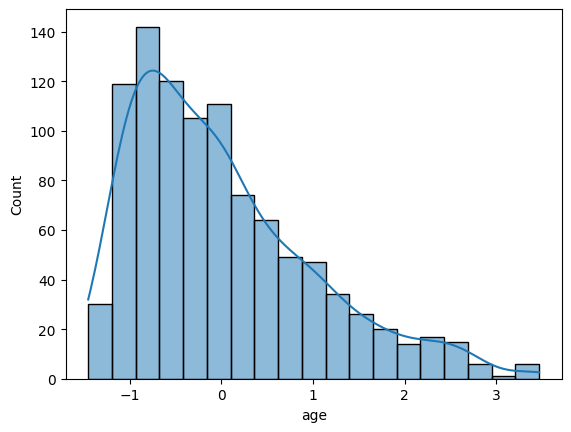

<Axes: xlabel='age', ylabel='Count'>

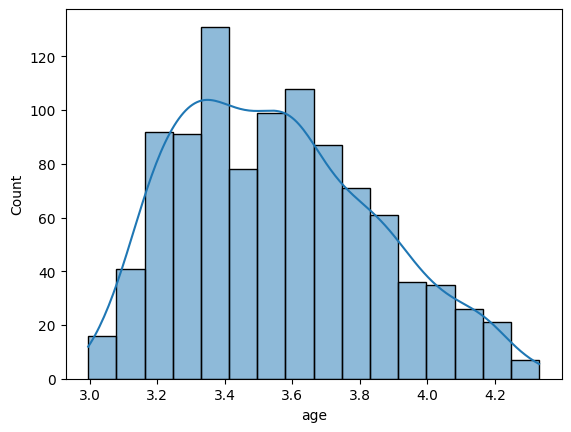

In [841]:
sns.histplot(data=age_df,x='age',kde=True)
plt.show()
sns.histplot(data=age_df_scaler_transform,x='age',kde=True)
plt.show()
sns.histplot(data=age_df_logtransformer,x='age',kde=True)

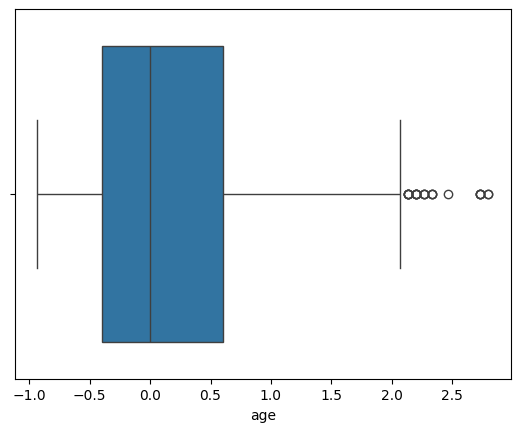

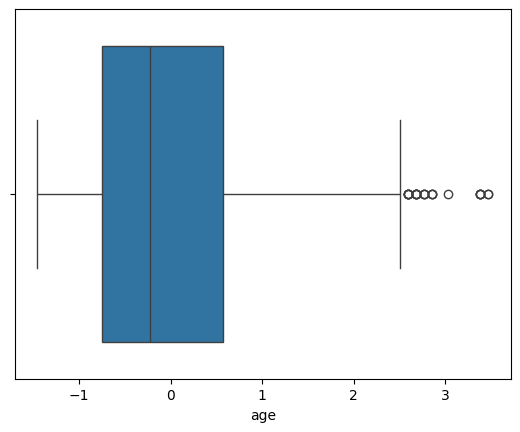

<Axes: xlabel='age'>

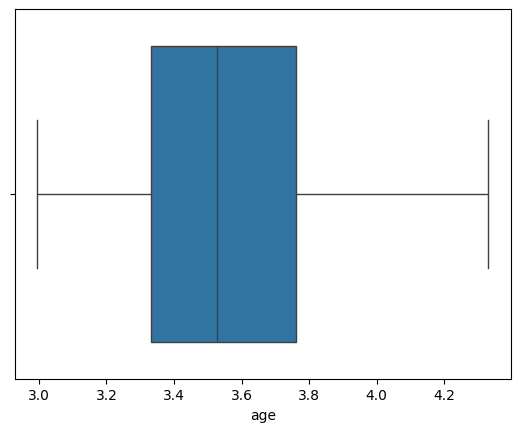

In [842]:
sns.boxplot(data=age_df,x='age')
plt.show()
sns.boxplot(data=age_df_scaler_transform,x='age')
plt.show()
sns.boxplot(data=age_df_logtransformer,x='age')

#### As observed from the privous scaling methods, it appears that the log transforamtion helped removing the effect/impact of the outlier on the data using data compresion and it appears more like a bell shape with standard deviation < 1

##### Apply log transformation

In [843]:
cols = ['duration', 'credit_amount', 'age']
scaler = FunctionTransformer(np.log1p)

for col in cols:
    customer_df[col] = scaler.fit_transform(customer_df[col])

In [844]:
customer_df.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.72,2.94,2.25,4.55,7.79,1.19,2.38,2.97,1.88,1.87,...,1.39,3.55,0.91,1.06,1.41,1.27,1.16,0.40,0.96,0.70
std,1.26,0.55,1.06,2.39,0.78,0.97,1.21,1.12,1.35,0.45,...,1.21,0.29,0.42,0.51,0.58,0.95,0.36,0.49,0.19,0.46
min,0.00,1.61,0.00,0.00,5.53,0.00,0.00,1.00,0.00,0.00,...,0.00,3.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,2.56,1.00,3.00,7.22,1.00,2.00,2.00,0.00,2.00,...,0.00,3.33,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00
50%,2.00,2.94,3.00,4.00,7.75,1.00,2.00,3.00,3.00,2.00,...,1.00,3.53,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
75%,3.00,3.22,3.00,6.00,8.29,1.00,4.00,4.00,3.00,2.00,...,3.00,3.76,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
max,3.00,4.29,4.00,9.00,9.82,4.00,4.00,4.00,3.00,2.00,...,3.00,4.33,2.00,2.00,4.00,3.00,2.00,1.00,1.00,1.00


Data Transformation

In [845]:
customer_df.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.72,2.94,2.25,4.55,7.79,1.19,2.38,2.97,1.88,1.87,...,1.39,3.55,0.91,1.06,1.41,1.27,1.16,0.40,0.96,0.70
std,1.26,0.55,1.06,2.39,0.78,0.97,1.21,1.12,1.35,0.45,...,1.21,0.29,0.42,0.51,0.58,0.95,0.36,0.49,0.19,0.46
min,0.00,1.61,0.00,0.00,5.53,0.00,0.00,1.00,0.00,0.00,...,0.00,3.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,2.56,1.00,3.00,7.22,1.00,2.00,2.00,0.00,2.00,...,0.00,3.33,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00
50%,2.00,2.94,3.00,4.00,7.75,1.00,2.00,3.00,3.00,2.00,...,1.00,3.53,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
75%,3.00,3.22,3.00,6.00,8.29,1.00,4.00,4.00,3.00,2.00,...,3.00,3.76,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
max,3.00,4.29,4.00,9.00,9.82,4.00,4.00,4.00,3.00,2.00,...,3.00,4.33,2.00,2.00,4.00,3.00,2.00,1.00,1.00,1.00


##### Applying z-sacler to credit_amoun

In [846]:
scaler = MinMaxScaler()
customer_df['credit_amount'] = scaler.fit_transform(customer_df[['credit_amount']])

In [847]:
pd.options.display.float_format = '{:.2f}'.format
customer_df.describe()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.72,2.94,2.25,4.55,0.53,1.19,2.38,2.97,1.88,1.87,...,1.39,3.55,0.91,1.06,1.41,1.27,1.16,0.40,0.96,0.70
std,1.26,0.55,1.06,2.39,0.18,0.97,1.21,1.12,1.35,0.45,...,1.21,0.29,0.42,0.51,0.58,0.95,0.36,0.49,0.19,0.46
min,0.00,1.61,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,3.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,2.56,1.00,3.00,0.39,1.00,2.00,2.00,0.00,2.00,...,0.00,3.33,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00
50%,2.00,2.94,3.00,4.00,0.52,1.00,2.00,3.00,3.00,2.00,...,1.00,3.53,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
75%,3.00,3.22,3.00,6.00,0.64,1.00,4.00,4.00,3.00,2.00,...,3.00,3.76,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
max,3.00,4.29,4.00,9.00,1.00,4.00,4.00,4.00,3.00,2.00,...,3.00,4.33,2.00,2.00,4.00,3.00,2.00,1.00,1.00,1.00


<Axes: xlabel='credit_amount', ylabel='Count'>

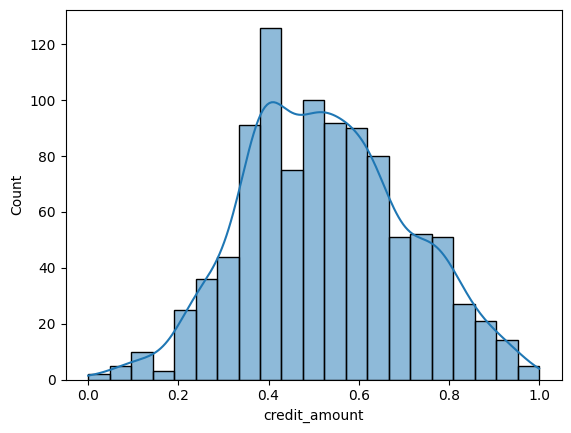

In [848]:
sns.histplot(data=customer_df,x='credit_amount',kde=True)

Data Splitting

In [851]:
Y = customer_df['class']
X = customer_df.drop('class',axis=1)

In [856]:
x_train, x_test , y_train , y_test = train_test_split(X,Y ,test_size=0.2,random_state=42)

In [857]:
x_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
29,1,4.11,2,0,0.77,1,4,3,3,2,4,2,4.16,1,1,2,1,1,1,1
535,2,3.09,1,2,0.52,1,1,2,1,2,1,0,3.53,1,2,1,1,1,0,1
695,3,1.95,3,9,0.37,3,2,2,3,2,4,1,3.93,1,2,1,1,1,0,1
557,3,3.09,4,4,0.70,0,2,1,0,2,4,1,3.40,0,1,2,1,1,1,1
836,3,2.56,3,6,0.29,0,2,4,0,2,2,0,3.09,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,2.94,0,4,0.76,1,4,2,3,2,4,2,3.69,0,1,2,0,2,1,1
270,3,2.94,3,4,0.55,0,3,4,3,2,3,1,3.50,1,1,1,1,1,0,0
860,3,3.22,1,9,0.73,4,2,4,3,2,2,3,3.33,1,1,2,1,1,0,1
435,0,2.56,3,6,0.41,0,2,2,2,2,1,3,3.26,1,1,1,1,1,1,1


In [858]:
x_test

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
521,1,2.94,3,6,0.59,1,2,2,0,2,2,3,3.22,1,1,1,1,1,0,1
737,1,2.94,3,4,0.67,2,2,3,3,2,4,0,3.58,1,1,1,3,2,1,1
740,1,3.22,0,4,0.52,2,3,2,3,2,3,0,3.50,0,1,1,1,1,0,1
660,2,2.56,3,6,0.38,1,2,3,2,2,4,3,3.18,1,2,1,1,1,0,1
411,3,3.53,1,9,0.78,1,3,3,3,2,2,0,3.58,1,1,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,3.22,3,6,0.60,3,4,3,1,2,2,0,3.30,1,1,1,0,1,1,1
332,0,4.11,3,4,0.79,2,1,4,0,2,2,1,3.22,1,1,1,0,1,0,1
208,3,3.22,3,0,0.76,1,2,2,2,2,2,0,3.09,2,1,1,3,1,0,1
613,1,3.22,0,9,0.62,1,2,1,0,1,4,0,3.14,0,2,1,1,1,0,0


In [859]:
y_train

29     0
535    0
695    1
557    0
836    1
      ..
106    0
270    1
860    1
435    0
102    1
Name: class, Length: 800, dtype: int64

In [860]:
y_test

521    0
737    1
740    1
660    1
411    1
      ..
408    1
332    0
208    1
613    1
78     1
Name: class, Length: 200, dtype: int64